# Contexto/Desafio

Analisar a eficiência de uma Turbina Eólica (Setor de energia). Ou seja, analisar os pontos gerados (de potência ativa -  atributo LV ActivePower) se pertencem a uma região aceitável de performance da curva teórica.

# Data

- Dados de uma Turbina Eólica
- Sistemas de Energia Eólica normalmente coletam dados de 10 em 10 minutos

### Descrição dos Atributos

- Date/Time: A data e a hora (periodos de 10 em 10 minutos);
- LV ActivePower (kW): Quanto de Potência Ativa se está gerando naquele minuto;
- Wind Speed (m/s): Quando é a velocidade do vento;
- Theoretical_Power_Curve (KWh): Curva teórica de potência (geração de potência ativa em condições ideais para um instante de tempo);
- Wind Direction: Direção do vento.

# Análise Exploratória e Tratamento dos dados

In [1]:
# importa as dependencias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# carrega e visualiza os dados
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data e Hora', 'PotenciaAtiva (kW)', 'VelocidadeVento (m/s)', 'PotenciaTeorica (Kwh)', 'DirecaoVento']
del turbina['DirecaoVento']
turbina.head(3)

,Data e Hora,PotenciaAtiva (kW),VelocidadeVento (m/s),PotenciaTeorica (Kwh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016


In [10]:
# verifica dados faltantes e os seus tipos
turbina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data e Hora            50530 non-null  object 
 1   PotenciaAtiva (kW)     50530 non-null  float64
 2   VelocidadeVento (m/s)  50530 non-null  float64
 3   PotenciaTeorica (Kwh)  50530 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [11]:
# transforma o tipo de dado da coluna Date e Hora
turbina['Data e Hora'] = pd.to_datetime(turbina['Data e Hora'])
turbina['Data e Hora'].head(3)

0   2018-01-01 00:00:00
1   2018-01-01 00:10:00
2   2018-01-01 00:20:00
Name: Data e Hora, dtype: datetime64[ns]

# Análise

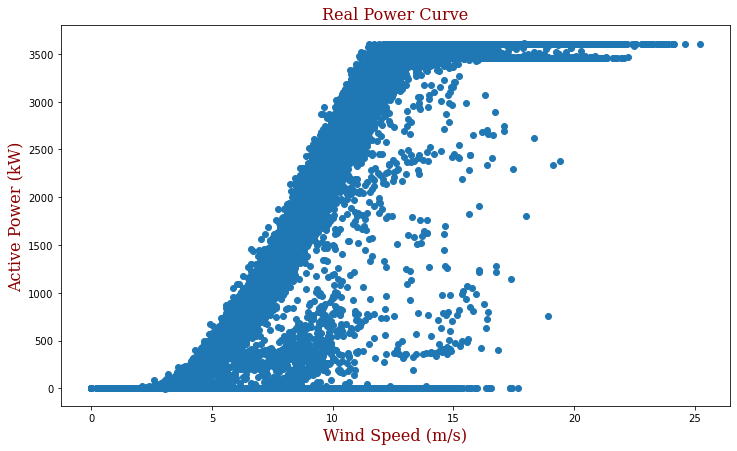

In [5]:
# grafica velocidade do vento versus potência ativa (curva de potência real)
font = {'family': 'serif',
        'color':  'darkred',
        'size': 16}
plt.figure(figsize=(12, 7))
plt.scatter(x=turbina['VelocidadeVento (m/s)'], y=turbina['PotenciaAtiva (kW)'])
plt.title('Real Power Curve', fontdict=font)
plt.xlabel('Wind Speed (m/s)', fontdict=font)
plt.ylabel('Active Power (kW)', fontdict=font)
plt.show()

- Cada ponto se interpreta como: Na velocidade de quase 18 m/s foi gerado 750 Kw;
- Para 0 Kw provavelmente a turbina esta em manutenção;
- A potência maxima é de 3600 e pouco Kw (por mais que aumente a velocidade do vento).

## Curva Teórica

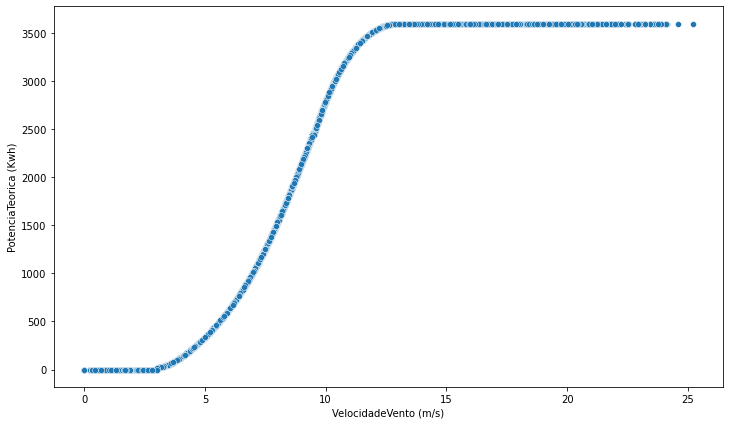

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=turbina, x='VelocidadeVento (m/s)', y='PotenciaTeorica (Kwh)')
plt.show()

- Para 5m/s a turbina deveria gerar 450 KW

## Limites aceitáveis

In [22]:
pot_real = turbina['PotenciaAtiva (kW)'].tolist()
pot_teorica = turbina['PotenciaTeorica (Kwh)'].tolist()

pot_max = []  # Cada valor %5 a mais da Pot. Teorica
pot_min = []  # Cada valor %5 a menos da Pot. Teorica
dentro_limite = []

# cria os limites superior e inferior
for pot in pot_teorica:
    pot_max.append(pot*1.05)
    pot_min.append(pot*0.95)

# define-se 3 regiões: dentro (aceitável), fora(não aceitável) e zero (manutenção)
for i, pot in enumerate(pot_real):
    if pot >= pot_min[i] and pot <= pot_max[i]:
        dentro_limite.append('dentro')
    elif pot == 0:
        dentro_limite.append('zero')
    else:
        dentro_limite.append('fora')

# calcula porcentagem de pontos dentro
print((dentro_limite.count('dentro')/len(dentro_limite))*100)

37.286760340391844


In [23]:
# adiciona a lista como coluna na tabela
turbina['DentroLimite'] = dentro_limite
turbina

,Data e Hora,PotenciaAtiva (kW),VelocidadeVento (m/s),PotenciaTeorica (Kwh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,dentro


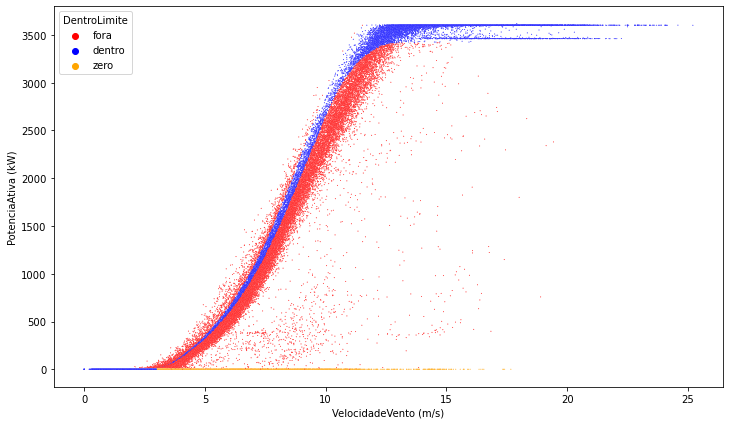

In [28]:
# grafico para comparar eficiencia da turbina
cores = {'dentro': 'blue',
         'fora': 'red',
         'zero': 'orange'}
plt.figure(figsize=(12, 7))
sns.scatterplot(data=turbina, x='VelocidadeVento (m/s)', y='PotenciaAtiva (kW)', hue='DentroLimite', s=1,
                palette=cores)
plt.show()

### Referencias

https://www.youtube.com/watch?v=vgPPr9dFOZQ

### Fonte de dados

https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset